# Regressão 1

# Introdução 

A regressão linear pode ser descrita como um modelo que busca estabelecer a previsão de uma variável resposta (`y`) com base em uma variável `x` (como ex. preço do condomínio, número de quartos, área etc). Assumindo que a relação entre tais variáveis seja linear.
$$
y \approx \alpha + \beta x + \epsilon
$$

**Isso é um modelo**

*"All models are wrong, but some are useful"*

                                         George E. P. Box

Um modelo pode ser entendido como uma aproximação para representar/descrever a realidade, mas, obviamente, não é a realidade propriamente dita.

# 1 - Regressão com statsmodels



In [6]:
# Importando bibliotecas 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statsmodels
import statsmodels.formula.api as smf # stats model formula

In [7]:
# Carregando dataset

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## Análise gráfica

(0.0, 10.5)

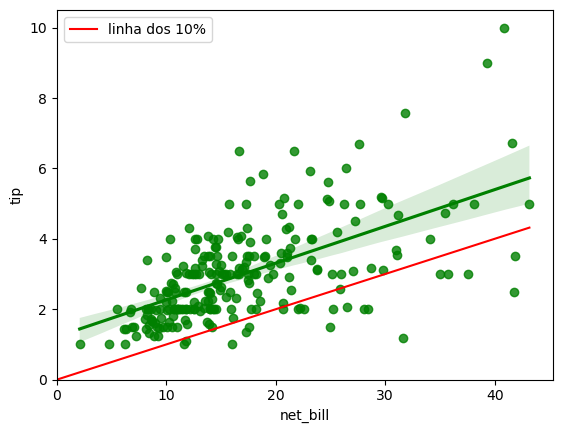

In [9]:
# Gráfico de dispersão 
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct'] < .5], color='green')
# sns.regplot(y='tip', x='net_bill', data=tips)

# Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1 * x 

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')
plt.legend()

# Opções estéticas
plt.xlim(left=0)
plt.ylim(bottom=0)

## Modelo de regressão linear simples pelo stats models

Abaixo, observe a sintaxe que define o modelo de regressão utilizando o API do pacote *formula* do stats models. A sintaxe é até bastante simples, possui semelhanças com o *scikitlearn* (o ```.fit()``` no caso), e caso você conheça o software *R*, a parte ```'tip ~ net_bill'``` vai ser familiar pra você.

Com esse pacote *formula* do statsmodels podemos definir a equação do modelo de uma forma flexível e prática. Abaixo, a variável que está à esquerda do ```~``` é a variável resposta, e a variável à direita é a variável explicativa. O statsmodels completa com os modelos da regressão linear, e estima os parâmetros com o comando ```.fit()```. Cria-se então o objeto ```reg```, que possui a regressão já "treinada".

Há diversos métodos e atributos nesse objeto, como o método ```reg.summary()``` que nos fornece um output bem completo do modelo de regressão.

In [11]:
# Gerando uma regressão apra 'tip' e 'net_bill'
# 'tip' - variável resposta
# 'net_bill' - variável explicativa

regr = smf.ols('tip ~ net_bill', data=tips).fit()
# ols --> Ordinary Least Squares (mínimos quadrados ordinários)
regr.summary() # Resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        15:29:52   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploração do objeto que contém os resultados do modelo

Para predizer novos dados, é necessário em primeiro lugar que estes dados estejam no mesmo formato que os dados originais. Abaixo vamos utilizar as 5 primeiras linhas do dataframe ```tips```, simulando a situação em que fossem novos dados que precisam ser preditos.

Em seguida, de forma similar ao *scikitlearn*, podemos predizer esses dados com o método ```.predict()```.

Este objeto ```reg``` que criamos, possui uma diversidade de métodos e atributos, como o atributo ```.params```, que guarda os parâmetros principais do modelo.

In [13]:
dados_novos = tips[:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [14]:
# Predição de dados novos
# utilizando o predict, similar ao scikit-learn

regr.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

In [15]:
type(regr)

statsmodels.regression.linear_model.RegressionResultsWrapper

**Onde o Python guarda os parâmetros?**

O objeto que criamos e armazenamos na variável ```regr``` do Python é um objeto do tipo ```RegressionResultsWrapper``` do *statsmodels*. Esse objeto vem com uma diversidade de métodos e atributos que armazenam os resultados do modelo e podem ser acessados de forma prática. Digite: ```regr.``` e pressione a tecla **TAB** para explorar um pouco as possibilidades.

In [17]:
regr.params

Intercept    1.330698
net_bill     0.099334
dtype: float64

In [18]:
regr.mse_model, regr.mse_resid, regr.mse_total

(154.70209729635695, 1.2831007427802623, 1.914454638062471)

# 2 - Estimativa de mínimos quadrados

**Os erros**

- Preditiva --> $\hat{y}_{i}=\hat{\alpha}+\hat{\beta}x_{i}$
- Valor real em componentes da preditiva --> $y_{i}=\hat{\alpha}+\hat{\beta}x_{i}+\hat{\varepsilon_{i}}$, em que $\hat{\varepsilon_{i}}$ é o erro/resíduo. Pode-se escrever então $y_{i}=\hat{y}_{i}+\hat{\varepsilon_{i}}$ (o valor real é a preditiva somada de um erro).
- O resíduo/erro:
$$\hat{\varepsilon_{i}}=y_{i}-\hat{y}_{i} $$
$$
\hat{\varepsilon_{i}}=y_{i}-(\hat{\alpha}+\hat{\beta}x_{i}),
$$ 

estimativas de $\alpha$ e $\beta$ afetam o resíduo.

- **Erro quadrático médio (mean squared error - MSE)**
$$
MSE = \frac{1}{N}\sum^{N}_{i}\hat{\varepsilon}_{i}^{2}
$$

- **Somma dos quadrados do erro (sum squared error - SSE)**
$$
SSE = \sum^{N}_{i}\hat{\varepsilon}_{i}^{2}
$$

sendo $\hat{\varepsilon_{i}}=y_{i}-\hat{y}_{i}$.

### Minimizando os erros

$$
SSE = \sum^{N}_{i}[y_{i}-(\hat{\alpha}+\hat{\beta}x_{i})] ^{2},
$$

$\hat{\alpha}$ e $\hat{\beta}$ são chamados de **estimadores de mínimos quadrados** (*ols --> Ordinary Least Squares (mínimos quadrados ordinários)*).

**Estimador de mínimos quadrados**

Derivando o SSE em função dos estimadores

$$
\text{Para }\alpha \longrightarrow \frac{\partial SSE}{\partial\alpha} = 0 \Longrightarrow \hat{\alpha}=\bar{y}-\hat{\beta}\bar{x}
$$

$$
\text{Para }\beta \longrightarrow \frac{\partial SSE}{\partial\beta} = 0 \Longrightarrow \hat{\beta}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})}
$$

**Propriedades dos estimadores de mínimos quadrados**

- A soma dos resíduos é zero $\sum_{i=1}^{N}\hat{\varepsilon}_{i}=0$
- Os resíduos não têm correlação **linear** com os preditores
- O ponto $(\bar{x}, \bar{y})$ está sempre na reta
- A distribuição dos estimadores é conhecida

# Qualidade do modelo

Quando se pensa na qualidade do modelo de regressão, pensa-se na decomposição da variância, em explicar a variabilidade dos dados.

Para isso, tem-se:
- **Soma de quadrados total SQT (total sum of squares - TSS or SST)**
$$
TSS (SQT) = \sum_{i=1}^{n}(y_{i}-\bar{y})^{2},
$$  *distância do ponto até a média, ao quadrado.*

- **Soma de quadrados do modelo SQM** (*explained sum of squares ESS* as known as *model sum squares* or *sum of squares due to the regression*)

$$
ESS (SQM) = \sum_{i=1}^{n}(\hat{y}_{i}-\bar{y})^{2},
$$
*"distância" da preditiva até a média geral.*

- **Soma de quadrados do erro/resíduo SQE** (*Residual sum of squares* also known as the *sum of squared errors* of prediction - SSE)
$$
SSE (SQE) = \sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2},
$$
*"distância do ponto até a reta de regressão, a preditiva.*

O modelo em si (**soma de quadrados do total** = **soma de quadrados do modelo** + **soma de quadrados do erro/resíduo**)
$$
\text{SQT} = \text{SQM} + \text{SQM}
$$

- Coeficientes de determinação ($R^{2}$)
$$
R^{2} = \frac{SQM(ESS)}{SQT(TSS)} = 1-\frac{SQE(SSE)}{SQT(TSS)},
$$ *pode ser entendido com a proporção da variância explicada pelo modelo.*

# 3 - Análise de resíduos

Algumas relações

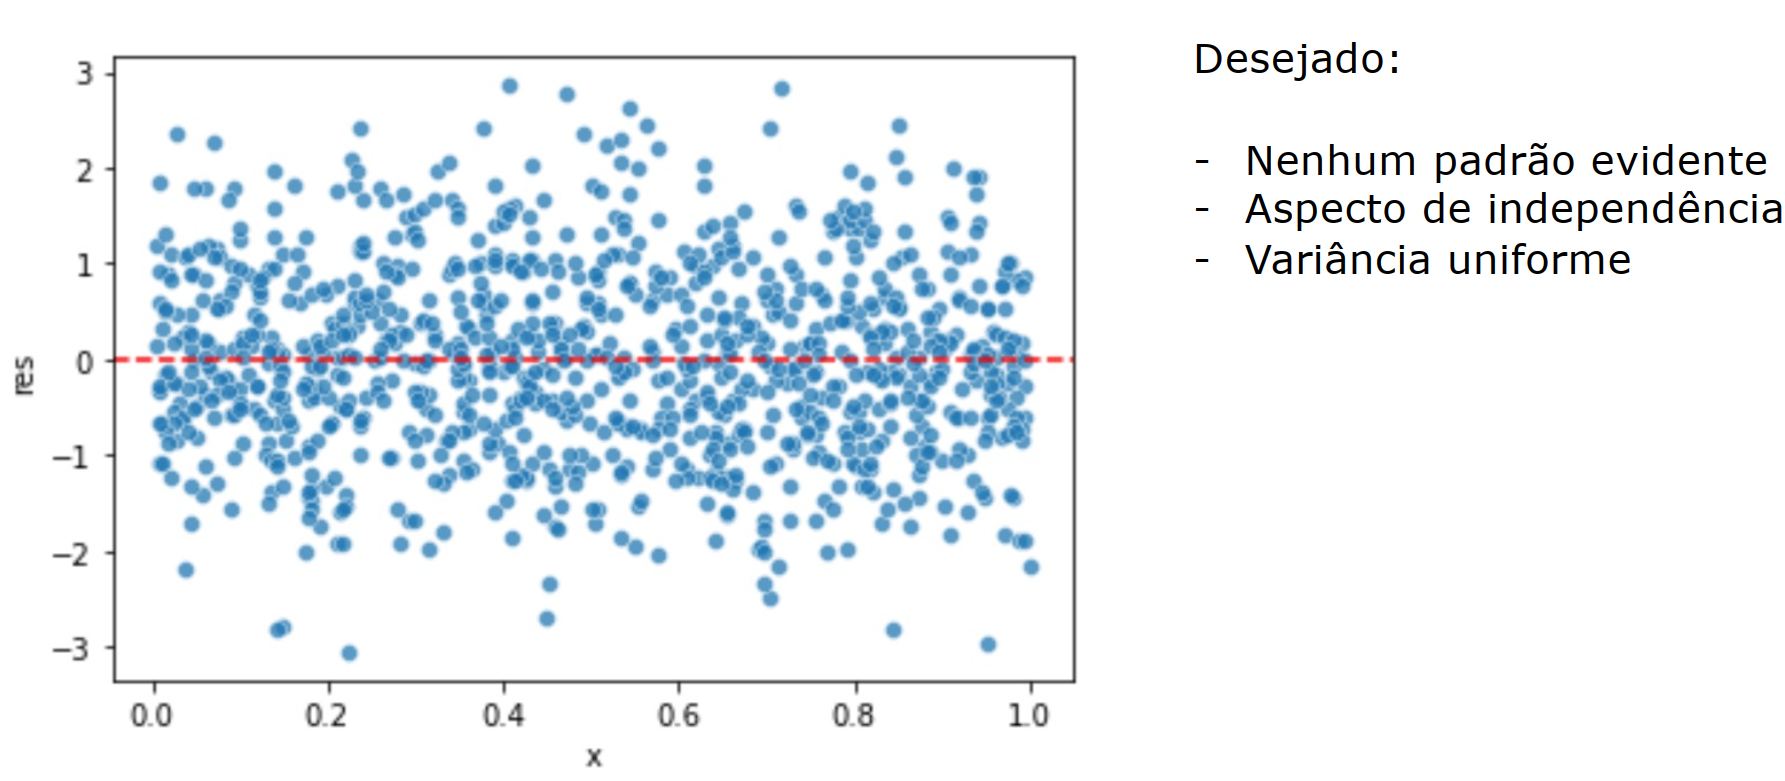

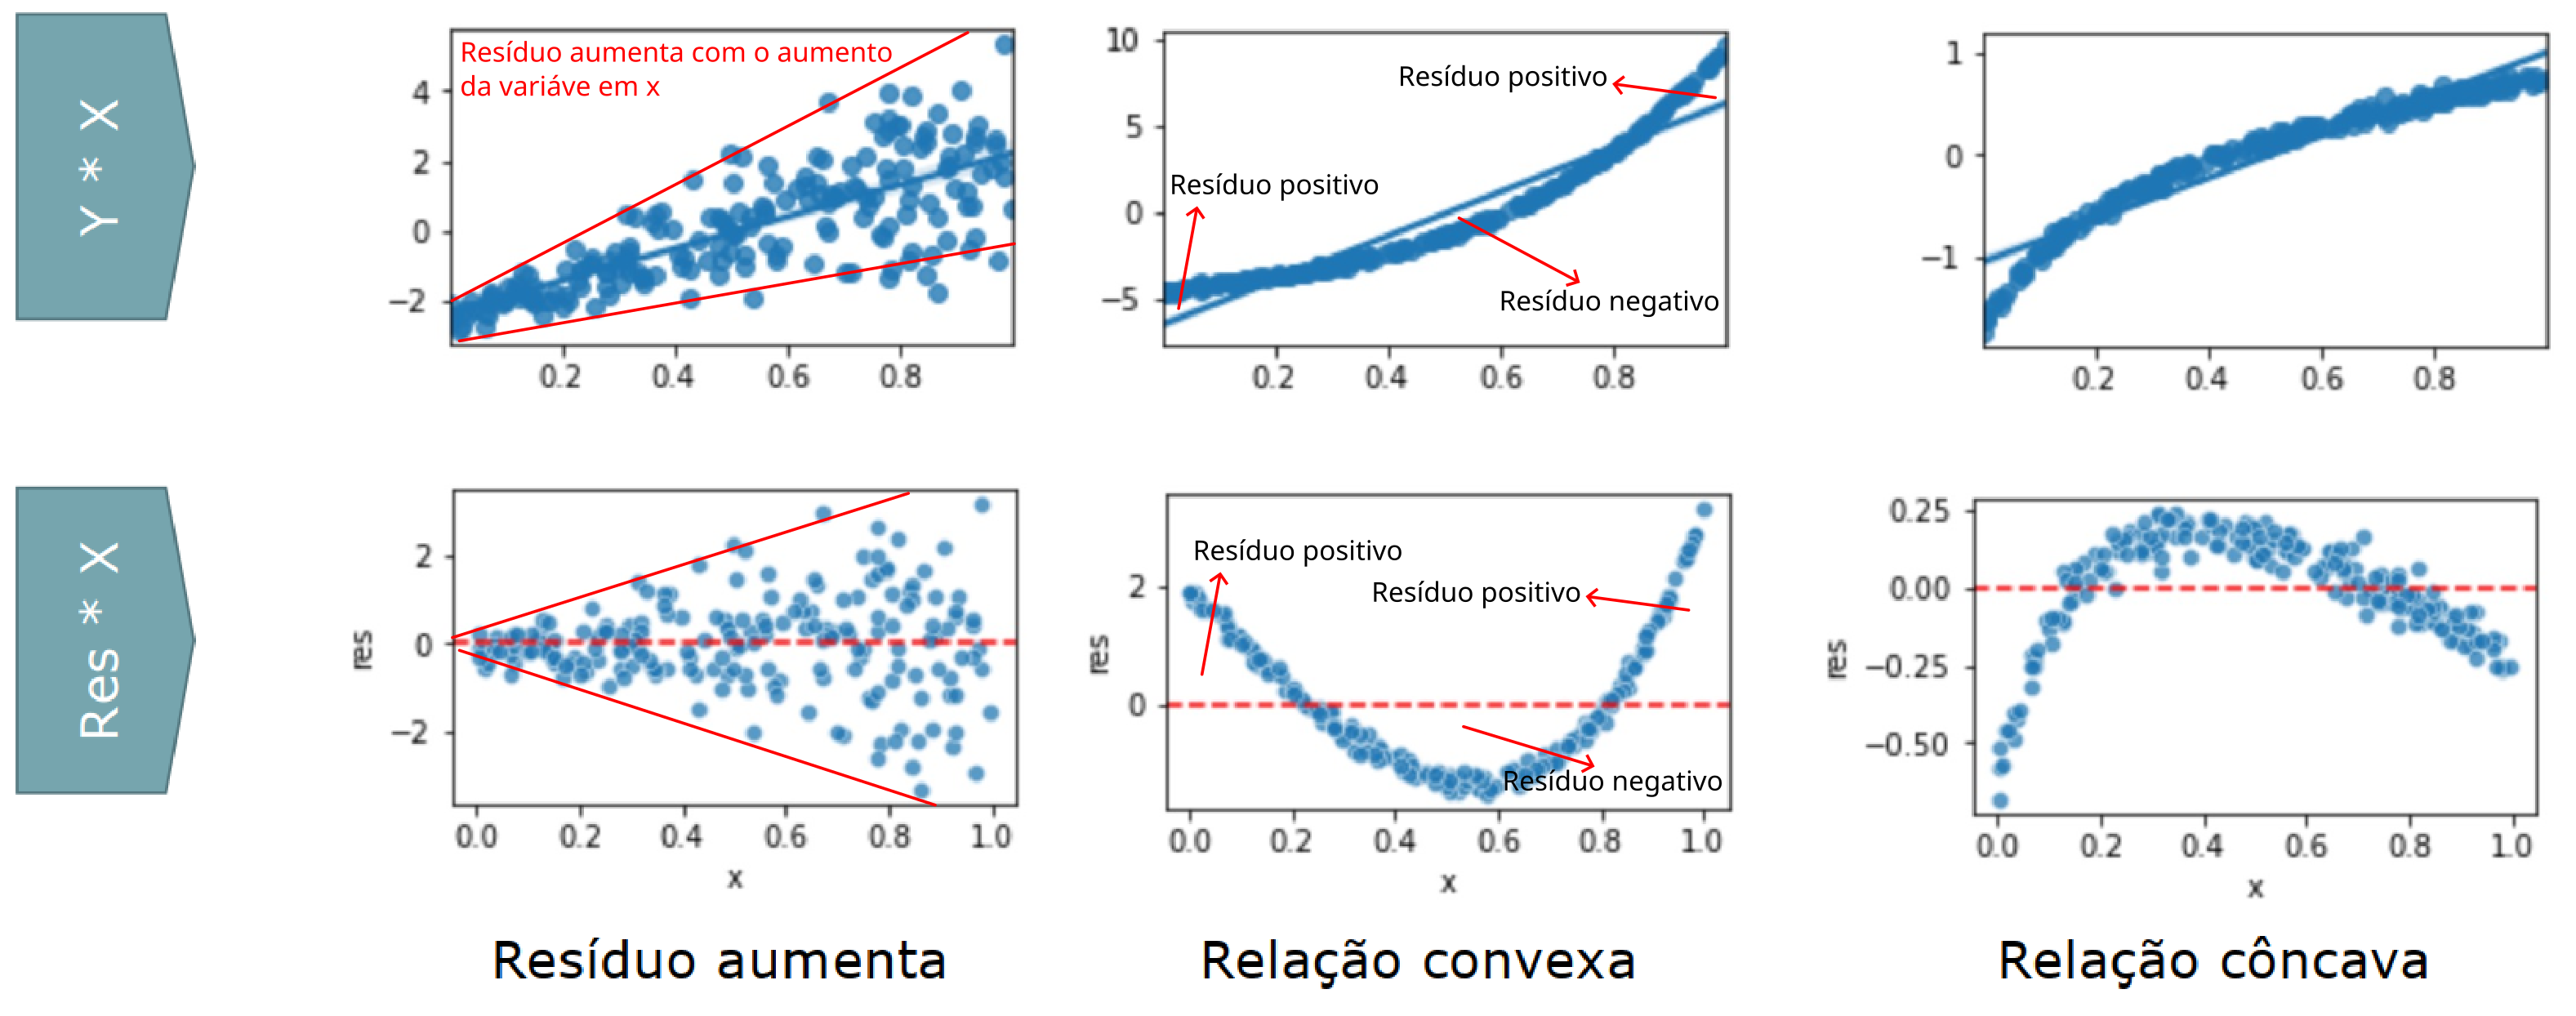

# 4 - Transformação da variável preditora (x)

#### Transformações em x

Uma forma de buscar um melhor ajuste em uma regressão com padrão de relação linear entre x e y é buscar uma função g(x) que linearize essa relação. Dentre as opções:
- categorizar x
- ajustar um polinômio
- transformar por uma função log, exponencial, raiz etc.

In [39]:
# gerando um dataset
df = pd.DataFrame({'y':np.random.randn(200), 'x':np.arange(0,1,.005)})

<Axes: xlabel='x', ylabel='y'>

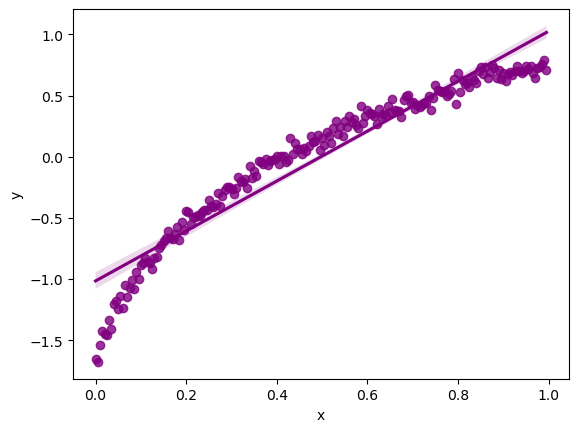

In [40]:
df['y'] = np.log((df['x'] - (df['x'].min()-.1))) + np.random.randn(200) * .05
df['y'] = df['y'] - df['y'].mean()

# plot
sns.regplot(x = 'x', y = 'y', data = df, color='purple')

### 4.1 - A regressão com a variável `x` "crua" resulta em um padrão convexo nos resíduos.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2215.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          1.83e-109
Time:                        15:29:53   Log-Likelihood:                 63.444
No. Observations:                 200   AIC:                            -122.9
Df Residuals:                     198   BIC:                            -116.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0157      0.025    -40.711      0.0

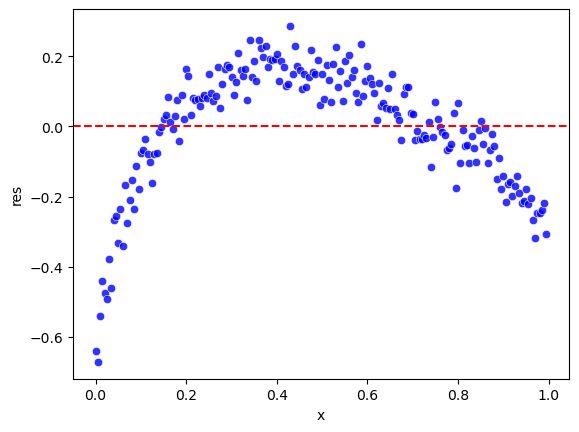

In [42]:
reg = smf.ols('y ~ x', data=df).fit()
print(reg.summary())
df['res'] = reg.resid # Armazenando o resíduo

# Plot
sns.scatterplot(x = 'x', y = 'res', data=df, alpha=.8, color='blue')
plt.axhline(y=0, color='red', ls='--')

### 4.2 - Ajustando um polinômio de segundo grau

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5976.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          4.75e-177
Time:                        15:29:53   Log-Likelihood:                 225.57
No. Observations:                 200   AIC:                            -445.1
Df Residuals:                     197   BIC:                            -435.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3634      0.017    -82.

Text(0.5, 1.0, 'Padrão dos resíduos')

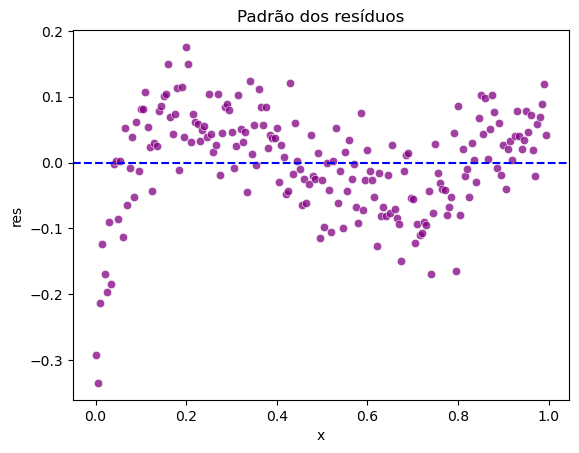

In [44]:
reg = smf.ols('y ~ x + np.power(x,2)', data=df).fit()
print(reg.summary())
df['res'] = reg.resid

# Plot
sns.scatterplot(x='x', y='res', data=df, color='purple', alpha=.75)
plt.axhline(y=0, color='blue', ls='--')
plt.title('Padrão dos resíduos')

Tem-se que:
- Intercept --> a
- x --> b
- np.power(x,2) --> c

Termos associados ao polinômio de segundo grau $f(x)=ax^{2}+bx+c$.

(0.0, 1.0)

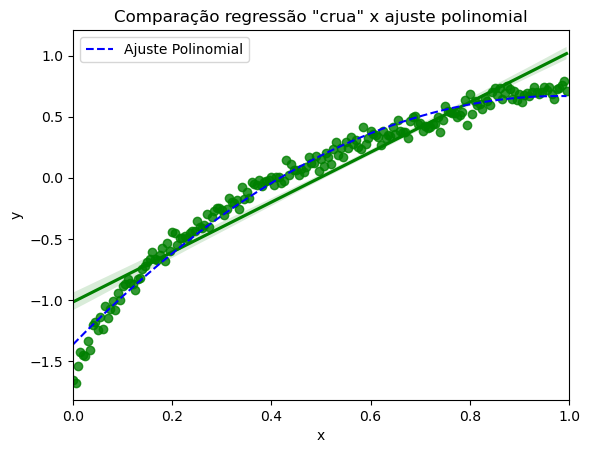

In [46]:
# Visualizando os dados obtidos a partir da regressão

# utilizando .fittedvalues para obter tais valores

sns.regplot(x='x', y='y', data=df, color='green')
plt.plot(df['x'], reg.fittedvalues, color='blue', ls='--', label='Ajuste Polinomial')

plt.title('Comparação regressão "crua" x ajuste polinomial')
plt.legend()
plt.xlim(left=0, right=1)

### 4.3 - Ajustando uma função exponencial

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1069.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           9.66e-82
Time:                        15:29:54   Log-Likelihood:               -0.99492
No. Observations:                 200   AIC:                             5.990
Df Residuals:                     198   BIC:                             12.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9735      0.063    -31.432      0.0

Text(0.5, 1.0, 'Padrão do resíduo')

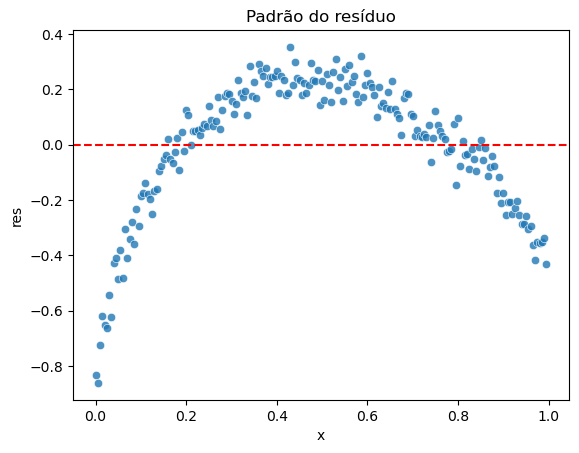

In [48]:
reg = smf.ols('y ~ np.exp(x)', data=df).fit()
print(reg.summary())
df['res'] = reg.resid

# Plotagem
sns.scatterplot(x='x', y='res', data=df, alpha=.8)
plt.axhline(y=0, color='red', ls='--')
plt.title('Padrão do resíduo')

Text(0.5, 1.0, 'Ajuste linear "raw" x ajuste exponencial')

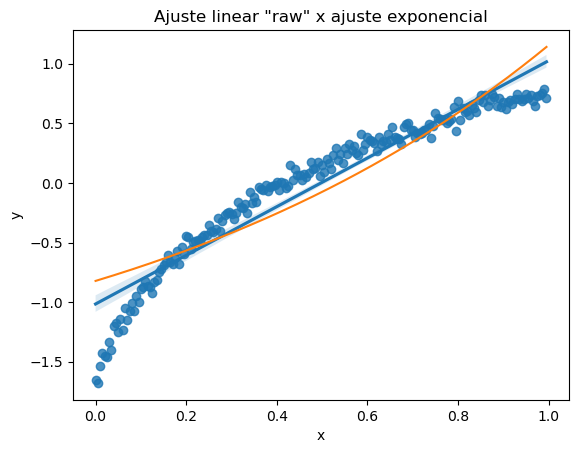

In [49]:
# Avaliando o ajuste 

sns.regplot(x='x', y='y', data=df)
plt.plot(df['x'], reg.fittedvalues)
plt.title('Ajuste linear "raw" x ajuste exponencial')

> Nitidamente o ajuste exponencial não é a melhor escolha, o fitting fica pior que o modelo inicial. Tem-se também que $R^{2}$ possui valores menores para o ajuste exponencial, indicando maior ineficiência.

### 4.4 - Ajustando uma função logaritmica

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.963e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          1.37e-217
Time:                        15:29:55   Log-Likelihood:                 314.89
No. Observations:                 200   AIC:                            -625.8
Df Residuals:                     198   BIC:                            -619.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6737      0.005    127.

Text(0.5, 1.0, 'Padrão do resíduo')

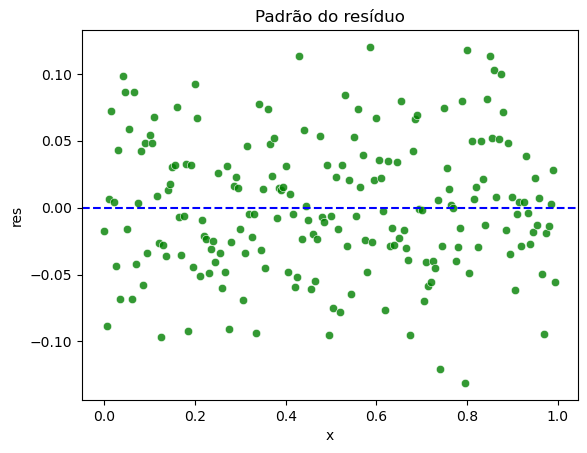

In [52]:
# reg = smf.ols('y ~ np.log(x)', data=df).fit()
# O caso acima é zero pois não há log de zero (vai ao infinito) ou números negativos

# Adicionando um pequena fração para evitar erros, uma vez que vai de 0 a 1
reg = smf.ols('y ~ np.log(x+.1)', data=df).fit()
print(reg.summary())
df['res'] = reg.resid

# Plotagem
sns.scatterplot(x='x', y='res', data=df, alpha=.8, color='green')
plt.axhline(y=0, color='blue', ls='--')
plt.title('Padrão do resíduo')

(0.0, 1.0)

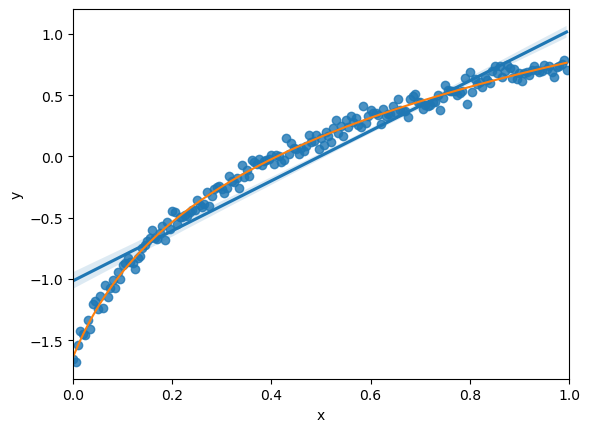

In [53]:
# Plotando o fitting

sns.regplot(x='x', y='y', data=df)
plt.plot(df['x'], reg.fittedvalues)

plt.xlim(left=0, right=1)

# 5 - Transformação da variável resposta (y)

In [55]:
# Carregando bibliotecas

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [56]:
plt.rc('figure', figsize=[6,5])

### Padrão esperado de resíduos

In [58]:
# Gerando os dados

x = np.arange(0, 1, 0.001)
df = pd.DataFrame({'y':np.exp(x + np.random.randn(1000)*.08), 'x':x})

df.head(3)

,y,x
0,1.057559,0.000
1,0.891444,0.001
2,1.014583,0.002


<Axes: xlabel='x', ylabel='y'>

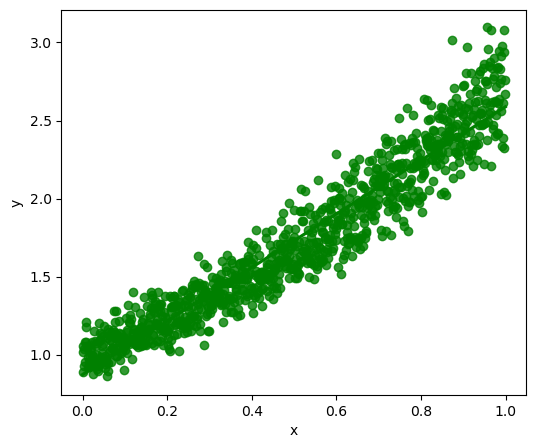

In [59]:
# regressão linear
sns.regplot(x='x', y='y', data=df, color='green') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.051e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:29:55   Log-Likelihood:                 460.02
No. Observations:                1000   AIC:                            -916.0
Df Residuals:                     998   BIC:                            -906.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8716      0.010     90.203      0.0

Text(0.5, 1.0, 'Padrão do resíduo')

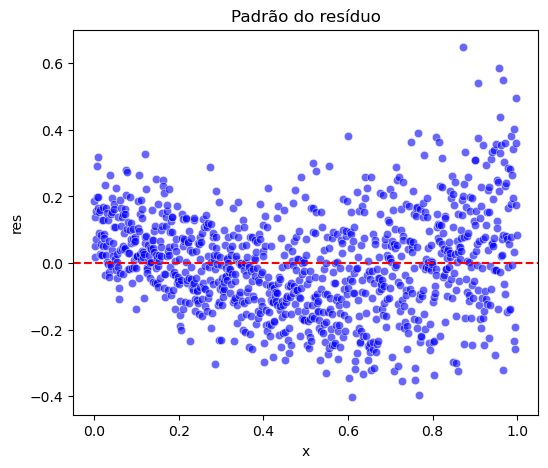

In [60]:
# Ajuste padrão (regressão linear)

reg = smf.ols('y ~ x', data=df).fit()
print(reg.summary())
df['res'] = reg.resid # Obtendo o resíduo

# Plot
sns.scatterplot(x='x', y='res', data=df, alpha=.6, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Padrão do resíduo')

In [61]:
# Outra forma de calcular o R^2

df['pred'] = reg.fittedvalues

print('-->' , df[['pred', 'y']].corr().iloc[0,1])
df[['pred', 'y']].corr()

--> 0.9556540046379972


,pred,y
pred,1.000000,0.955654
y,0.955654,1.000000


Há uma relação íntima entre correlação e $R^{2}$ (coeficiente de determinação) - $r = \sqrt(R^{2})$.

In [63]:
# Note
r = df[['pred', 'y']].corr().iloc[0,1]
print('Esse é o valor da correlação {}.'.format(r))

# O R^2
R2 = r**2
print('--> Esse é o valor do R^2 {}.'.format(R2))

Esse é o valor da correlação 0.9556540046379972.
--> Esse é o valor do R^2 0.9132745765806412.


                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:29:56   Log-Likelihood:                 1122.5
No. Observations:                1000   AIC:                            -2241.
Df Residuals:                     998   BIC:                            -2231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0031      0.005     -0.622      0.5

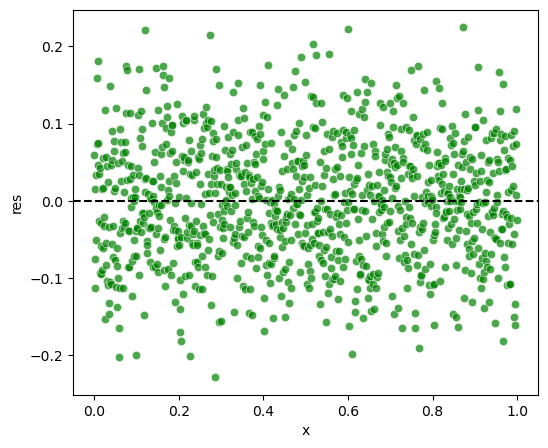

In [64]:
#### Log na variável resposta usando o Patsy 

reg = smf.ols('np.log(y) ~ x', data=df).fit()
print(reg.summary())
df['res'] = reg.resid

#Plotando
sns.scatterplot(x='x', y='res', data=df, color='green', alpha=.7)
plt.axhline(y=0, color='black', ls='--')

#### Não é possível comparar o R^2 desse modelo (log(y)) com o do primeiro, pois está na base log(). Veja...

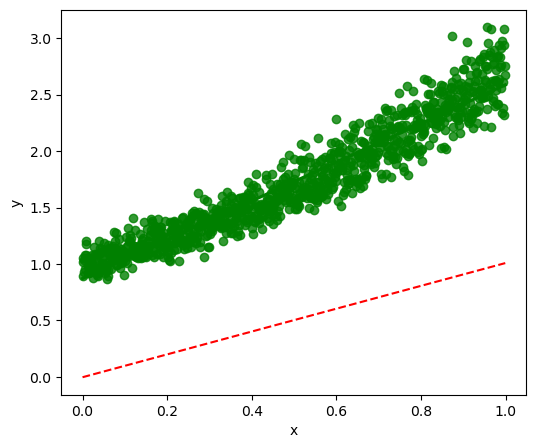

In [66]:
sns.regplot(x='x', y='y', data=df, color='green')
plt.plot(df['x'], reg.fittedvalues, color='red', ls='--')

# Note que são escalas diferentes

#### Para encontrar o R^2 original é necessário aplicar a exponencial `exp(reg.fittedvalues)`


In [68]:
# Adicionando os valores ao df

df['pred_y'] = np.exp(reg.fittedvalues)
df.head(3)

,y,x,res,pred,pred_y
0,1.057559,0.000,0.059063,0.871646,0.996906
1,0.891444,0.001,-0.112826,0.873363,0.997915
2,1.014583,0.002,0.015553,0.875080,0.998926


In [69]:
# Calculando o R^2

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.9270241152728084

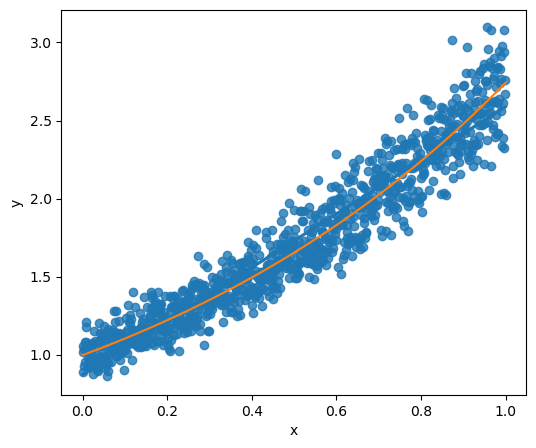

In [70]:
# Gerando então os painéis comparativos

sns.regplot(x='x', y='y', data=df)
plt.plot(df['x'], df['pred_y'])

# 6 - Multiplicação de matrizes

Conceito importante para entendimento da regressão múltipla.

# 7 - Algebra matricial em modelos de regressão

#### Multiplicação de matrizes e a regressão

Para se compreender a algebra realizada pelo Python.

$$ X =  
\begin{bmatrix} 
1 & 3 \\ 
1 & 2 \\ 
1 & 4 \\ 
\end{bmatrix}   \text{     Design matrix}
$$

$$\hat{B}= 
\begin{bmatrix} 
\hat{\alpha} \\ 
\hat{\beta} 
\end{bmatrix}   \text{     Vetor de parâmetros}
$$


$$Y = 
\begin{bmatrix}
\hat{y}_{1} \\
\hat{y}_{2} \\
\hat{y}_{3}
\end{bmatrix}    \text{     Preditiva}
$$

- X --> é a *matriz de dados* ou *matriz de design* ou *design matrix*: Primeira coluna é associada ao intercepto, a segunda coluna está associada a variável (na regressão simples).
- $\hat{B}$ --> é o vetor das estimativas dos parâmetros, um vetor coluna.
- Y --> Preditiva

$$
X.\hat{B} =
\begin{bmatrix} 
1 & 3 \\ 
1 & 2 \\ 
1 & 4 \\ 
\end{bmatrix}
\begin{bmatrix} 
\hat{\alpha} \\ 
\hat{\beta} 
\end{bmatrix} =
\begin{bmatrix}
\hat{\alpha} + 3\hat{\beta} \\
\hat{\alpha} + 2\hat{\beta} \\
\hat{\alpha} + 4\hat{\beta} \\
\end{bmatrix} = 
\begin{bmatrix}
\hat{y}_{1} \\
\hat{y}_{2} \\
\hat{y}_{3}
\end{bmatrix}
$$

#### Matrizes e regressão múltipla

Neste caso a terceira coluna na matriz de dados (*design matrix*) pode indicar uma variável dummy.

$$ X =  
\begin{bmatrix} 
1 & 3 & 1 \\ 
1 & 2 & 0 \\ 
1 & 4 & 0 \\ 
\end{bmatrix}   \text{     Design matrix}
$$

$$\hat{B}= 
\begin{bmatrix} 
\hat{\alpha} \\ 
\hat{\beta_{1}}  \\
\hat{\beta_{2}} 
\end{bmatrix}   \text{     Vetor de parâmetros}
$$


$$
X.\hat{B} =
\begin{bmatrix} 
1 & 3 & 1 \\ 
1 & 2 & 0 \\ 
1 & 4 & 0 \\ 
\end{bmatrix}
\begin{bmatrix} 
\hat{\alpha} \\ 
\hat{\beta_{1}}  \\
\hat{\beta_{2}} 
\end{bmatrix} =
\begin{bmatrix}
\hat{\alpha} + 3\hat{\beta_{1}} + 1\hat{\beta_{2}} \\
\hat{\alpha} + 2\hat{\beta_{1}} + 0\hat{\beta_{2}} \\
\hat{\alpha} + 4\hat{\beta_{1}} + 0\hat{\beta_{2}} \\
\end{bmatrix} = 
\begin{bmatrix}
\hat{y}_{1} \\
\hat{y}_{2} \\
\hat{y}_{3}
\end{bmatrix}
$$

Obtendo as preditivas de uma regressão múltipla ($\hat{y}_{1},\hat{y}_{2}, \hat{y}_{3}$).

# 7 - Introdução ao *statsmodels* e Patsy

Objetivos: 
- Conhecer o Patsy (especificações de modelo similar ao **R**)
- Introduzir modelagem com o statsmodels

In [83]:
# Carregando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


#### <span style="color:blue">7.1 - Introdução ao Patsy</span><a name="1"></a>


O Patsy é um pacote que permite especificar uma matriz de modelagem de uma forma prática como no **R**, com a seguinte sintaxe:
```
'y ~ x1 + x2 + x3'
```

Ele possui diversos recursos como:
- inclui intercepto (ou exclui utilizando +0)
- inserir funções das variáveis de forma prática
- trabalhar com dados categorizados
- facilita a aplicação a novos dados

#### <span style='color:blue'> 7.2 - Definindo a matriz de modelagem com o Patsy </span>

In [87]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 1', tips[:5])
X

# Variável dummy criada automaticamente em sex e smoker (T.No - indica que vale 1 quando "no")
# + 1 - indica o valor do intercepto (não é necessário)
# Matriz X e y definidas

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  total_bill
          1              1             1     2       16.99
          1              0             1     3       10.34
          1              0             1     3       21.01
          1              0             1     2       23.68
          1              1             1     4       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [88]:
y

# Os objetos estão sendo desempacotados em y e X

DesignMatrix with shape (5, 1)
  tip_pct
  0.06320
  0.19124
  0.19989
  0.16249
  0.17207
  Terms:
    'tip_pct' (column 0)

#### <span style='color:blue'> 7.3 - Retirando o intercepto </span>

É possível retirar o intercepto no Patsy simplesmente com a instrução `+0`.

In [90]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  size  total_bill
          0            1             1     2       16.99
          1            0             1     3       10.34
          1            0             1     3       21.01
          1            0             1     2       23.68
          0            1             1     4       24.59
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

**Note que agora tem-se `sex[Male]` e `sex[Female]`, ou seja, é como se houvesse dois interceptos agora, uma para cada sexo.**

#### <span style='color:blue'> 7.4 - Transformações de dados com o Patsy</span>

##### <span style='color:purple'>Aplicando funções</span>

Pode-se aplicar funções vetorizadas no Patsy de forma transparente, dentro da string. Em especial, a maioria das funções do Numpy são vetorizadas e podem ser usadas normalmente, como o `np.lot()` e `np.exp()` que fazem logaritmo e exponencial ($e^{x}$), respectivamente.

In [94]:
y, X = patsy.dmatrices('tip_pct ~ np.log(size) + standardize(total_bill) + center(tip)', tips[:5])
X

# standardize - função do patsy que padroniza, tira a média e divide pelo desvio padrão
#             como se a unidade, agora, fosse em termos de desvio padrão
# center - centra no zero, subtraí a média de cada valor de gorjeta, nesse caso.

DesignMatrix with shape (5, 4)
  Intercept  np.log(size)  standardize(total_bill)  center(tip)
          1       0.69315                 -0.44762       -1.608
          1       1.09861                 -1.72407       -0.958
          1       1.09861                  0.32401        0.882
          1       0.69315                  0.83651        0.692
          1       1.38629                  1.01118        0.992
  Terms:
    'Intercept' (column 0)
    'np.log(size)' (column 1)
    'standardize(total_bill)' (column 2)
    'center(tip)' (column 3)

In [95]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + standardize(size) + center(total_bill) + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  standardize(size)  center(total_bill)
          0            1             1           -1.06904              -2.332
          1            0             1            0.26726              -8.982
          1            0             1            0.26726               1.688
          1            0             1           -1.06904               4.358
          0            1             1            1.60357               5.268
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'standardize(size)' (column 3)
    'center(total_bill)' (column 4)

##### <span style='color:purple'>Somando variáveis dentro do Patsy</span>

Como o caractere ```+``` é interpretado dentro do contexto da construção da matriz de modelagem, se quisermos somar variáveis no Patsy podemos usar a função ```I()```. 

In [97]:
y, X = patsy.dmatrices('tip_pct ~ I(size + total_bill) + size + total_bill', tips[:5])
X

# Matriz X e y definidas

DesignMatrix with shape (5, 4)
  Intercept  I(size + total_bill)  size  total_bill
          1                 18.99     2       16.99
          1                 13.34     3       10.34
          1                 24.01     3       21.01
          1                 25.68     2       23.68
          1                 28.59     4       24.59
  Terms:
    'Intercept' (column 0)
    'I(size + total_bill)' (column 1)
    'size' (column 2)
    'total_bill' (column 3)

##### <span style='color:purple'>Somando variáveis dentro do Patsy</span>

O Patsy calcula as variáveis dummy para variáveis tipo **str**. Mas caso queira tratar uma variável numérica como categorizada é preciso usar a função ```C()```.

In [99]:
# Categorizando uma variável numérica com "C()"

y, X = patsy.dmatrices('tip_pct ~ sex + C(size) + total_bill', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  C(size)[T.3]  C(size)[T.4]  total_bill
          1              1             0             0       16.99
          1              0             1             0       10.34
          1              0             1             0       21.01
          1              0             0             0       23.68
          1              1             0             1       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'C(size)' (columns 2:4)
    'total_bill' (column 4)

##### <span style='color:purple'>Definindo interações com Patsy<span>
Podemos inserir interações no Patsy da mesma forma que em boa parte dos softwares estatísticos programáveis com a sintaxe ```var1*var2```.


In [101]:
y, X = patsy.dmatrices('tip_pct ~ sex + time + sex*time', tips[:5])
X

# Multiplicação entre as variáveis

DesignMatrix with shape (5, 4)
  Intercept  sex[T.Female]  time[T.Dinner]  sex[T.Female]:time[T.Dinner]
          1              1               1                             1
          1              0               1                             0
          1              0               1                             0
          1              0               1                             0
          1              1               1                             1
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'time' (column 2)
    'sex:time' (column 3)

In [102]:
y, X = patsy.dmatrices('tip_pct ~ sex:time', tips[:5])
X

DesignMatrix with shape (5, 4)
  Columns:
    ['Intercept',
     'time[T.Dinner]',
     'sex[T.Female]:time[Lunch]',
     'sex[T.Female]:time[Dinner]']
  Terms:
    'Intercept' (column 0), 'sex:time' (columns 1:4)
  (to view full data, use np.asarray(this_obj))

In [103]:
y, X = patsy.dmatrices('tip_pct ~ sex:time + 0', tips[:5])
X

DesignMatrix with shape (5, 4)
  Columns:
    ['sex[Male]:time[Lunch]',
     'sex[Female]:time[Lunch]',
     'sex[Male]:time[Dinner]',
     'sex[Female]:time[Dinner]']
  Terms:
    'sex:time' (columns 0:4)
  (to view full data, use np.asarray(this_obj))

#### <span style="color:blue"> 7.5 - Aplicando patsy a dados novos</span>

Como vimos, a função ```patsy.dmatrices()``` constroi a matriz de modelagem de acordo com as instruções do string que é passado como parâmetro. Com bastante frequência, vamos precisar aplicar o nosso modelo a dados novos, vamos portanto, precisar construir a mesma matriz de dados para esses dados novos. 

A função ```patsy.build_design_matrices()``` cumpre com essa tarefa de construir a matriz de modelagem para novos dados, de modo a facilitar bastante a implantação do modelo.

In [105]:
novos_dados = tips[20:30]
novos_dados

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
20,17.92,4.08,Male,No,Sat,Dinner,2,0.294798,13.84
21,20.29,2.75,Female,No,Sat,Dinner,2,0.156784,17.54
22,15.77,2.23,Female,No,Sat,Dinner,2,0.164697,13.54
23,39.42,7.58,Male,No,Sat,Dinner,4,0.238065,31.84
24,19.82,3.18,Male,No,Sat,Dinner,2,0.191106,16.64
25,17.81,2.34,Male,No,Sat,Dinner,4,0.151261,15.47
26,13.37,2.00,Male,No,Sat,Dinner,2,0.175901,11.37
27,12.69,2.00,Male,No,Sat,Dinner,2,0.187091,10.69
28,21.70,4.30,Male,No,Sat,Dinner,2,0.247126,17.40
29,19.65,3.00,Female,No,Sat,Dinner,2,0.180180,16.65


In [106]:
# Construindo a matriz de design nos dados novos

new_X = patsy.build_design_matrices([X.design_info], novos_dados)
new_X

[DesignMatrix with shape (10, 4)
   Columns:
     ['sex[Male]:time[Lunch]',
      'sex[Female]:time[Lunch]',
      'sex[Male]:time[Dinner]',
      'sex[Female]:time[Dinner]']
   Terms:
     'sex:time' (columns 0:4)
   (to view full data, use np.asarray(this_obj))]

In [107]:
np.asarray(new_X)

array([[[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]])

#### <span style='color:blue'> 7.6 - Introdução ao Statsmodels</span>



##### <span style="color:purple">Usando a api do statsmodels</span> 

O statsmodels tem o API padrão, que é compatível com o Patsy, ou seja, você pode inserir a matriz de modelagem fornecida pelo ```patsy.dmatrices()```, bem como um objeto do numpy ou do pandas, como fizemos com o scikitlearn.

In [110]:
# Definindo uma matriz de design

y, X = patsy.dmatrices('tip ~ sex + time + smoker +  day', tips)
X

DesignMatrix with shape (244, 7)
  Columns:
    ['Intercept',
     'sex[T.Female]',
     'time[T.Dinner]',
     'smoker[T.No]',
     'day[T.Fri]',
     'day[T.Sat]',
     'day[T.Sun]']
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'time' (column 2)
    'smoker' (column 3)
    'day' (columns 4:7)
  (to view full data, use np.asarray(this_obj))

In [111]:
# Aplicando o Statsmodels

modelo = sm.OLS(y, X).fit()
modelo.summary()

# OLS maiúsculo para diferenciar da api fórmula

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.117
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.353
Time:                        15:29:58   Log-Likelihood:                -421.55
No. Observations:                 244   AIC:                             857.1
Df Residuals:                     237   BIC:                             881.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9124      0.244     11.941      0.000       2.432       3.393
sex[T.Female]     -0.1702      0.190     -0.896      0.371      -0.544       0.204
time[T.Dinner]     0.5034      0.595      0.846      0.398      -0.669       1.675
smoker[T.No]      -0.0843      0.193     -0.437      0.662      -0.464       0.296
day[T.Fri]        -0.3972      0.528     -0.753      0.452      -1.437       0.642
day[T.Sat]        -0.3243      0.632     -0.513      0.609      -1.570       0.921
day[T.Sun]        -0.0571      0.633     -0.090      0.928      -1.304       1.189
==============================================================================
Omnibus:                       80.856   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.887
Skew:                           1.466   Prob(JB):                     5.40e-50
Kurtosis:                       6.703   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <span style="color:purple"> Usando a api *formula* do statsmodels</span>

O statsmodels possui um pacote *formula*, que já integra a interface do Patsy. Com ele podemos indicar a sintaxe do modelo diretamente na função do modelo, ```ols()``` no caso. Repare que a função vem com letras minúsculas, em contraste com o API padrão do statsmodels, propositalmente, para deixar claro qual o API que está sendo utilizado.

In [113]:
# Com essa api tudo é realizada de uma única vez, já que o Patsy é integrado

results = smf.ols('tip_pct ~ sex + size + np.log(total_bill)', tips).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.953
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.46e-05
Time:                        15:29:58   Log-Likelihood:                 107.89
No. Observations:                 244   AIC:                            -207.8
Df Residuals:                     240   BIC:                            -193.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5401      0.071      7.618      0.000       0.400       0.680
sex[T.Female]         -0.0105      0.021     -0.496      0.620      -0.052       0.031
size                   0.0176      0.013      1.345      0.180      -0.008       0.043
np.log(total_bill)    -0.1313      0.029     -4.589      0.000      -0.188      -0.075
==============================================================================
Omnibus:                      460.749   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214315.295
Skew:                          10.735   Prob(JB):                         0.00
Kurtosis:                     146.594   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8 - Regressão múltipla

- Entender o uso de regressão linear múltipla
- Análise de resíduos na regressão múltipla

In [115]:
# Carregando bibliotecas 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [116]:
# Carrregando o dataset

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


##### <span style='color:purple'> Aplicando a regressão múltipla</span>

In [118]:
# Regressão múltipla

reg = smf.ols('np.log(tip) ~ sex + day + C(size) + net_bill + smoker', data= tips).fit()

In [119]:
# Alguns métodos
reg.mse_model, reg.mse_resid, reg.mse_total

(1.528490459380825, 0.1267846476304371, 0.1902363510430061)

In [120]:
# Obtendo o resíduo
tips['res_log'] = reg.resid # Extrair o resíduo

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.06
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           7.83e-18
Time:                        15:29:58   Log-Likelihood:                -88.106
No. Observations:                 244   AIC:                             200.2
Df Residuals:                     232   BIC:                             242.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1771      0.194      0.913      0.362      -0.205       0.559
sex[T.Female]     0.0122      0.050      0.246      0.806      -0.085       0.110
day[T.Fri]        0.0514      0.097      0.527      0.598      -0.140       0.243
day[T.Sat]       -0.0206      0.063     -0.328      0.743      -0.144       0.103
day[T.Sun]        0.0567      0.065      0.877      0.381      -0.071       0.184
C(size)[T.2]      0.3801      0.184      2.064      0.040       0.017       0.743
C(size)[T.3]      0.5087      0.196      2.594      0.010       0.122       0.895
C(size)[T.4]      0.6049      0.202      2.993      0.003       0.207       1.003
C(size)[T.5]      0.5456      0.253      2.158      0.032       0.048       1.044
C(size)[T.6]      0.7909      0.271      2.915      0.004       0.256       1.325
smoker[T.No]     -0.0074      0.051     -0.146      0.884      -0.108       0.093
net_bill          0.0222      0.004      6.112      0.000       0.015       0.029
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.617
Skew:                          -0.123   Prob(JB):                        0.734
Kurtosis:                       2.998   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='color:red'> **--> Análise**</span>

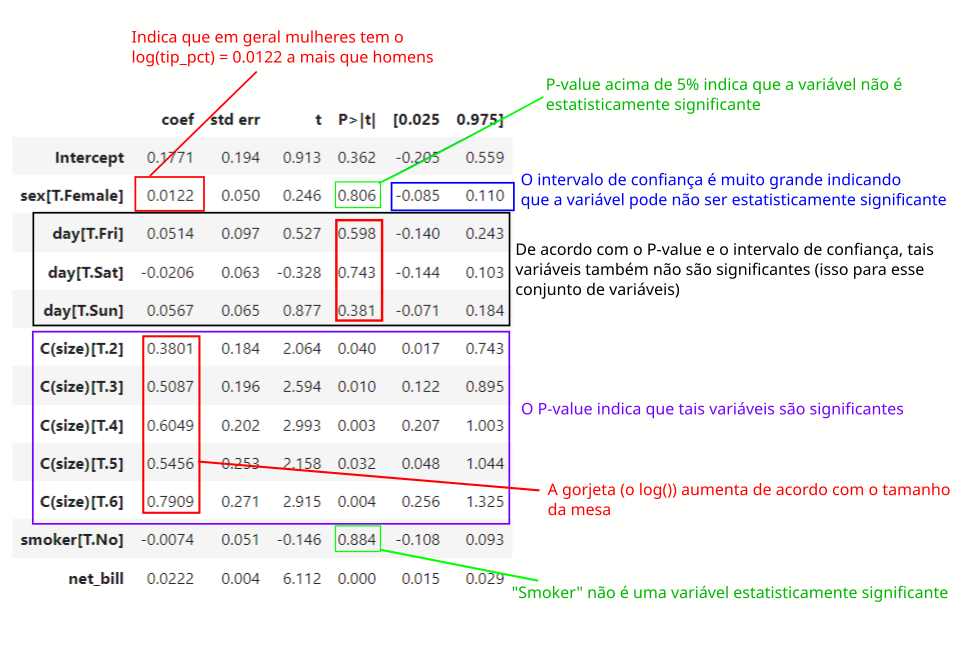

**Modificando de acordo com as variáveis que desempenham um papel relevante para a análise de interesse**

In [124]:
# Nova regressão
reg = smf.ols('np.log(tip) ~ C(size) + net_bill', tips).fit()

In [125]:
tips['res_log'] = reg.resid

# Gerando o sumário
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     22.00
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.56e-20
Time:                        15:29:58   Log-Likelihood:                -89.247
No. Observations:                 244   AIC:                             192.5
Df Residuals:                     237   BIC:                             217.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1860      0.178      1.044      0.298      -0.165       0.537
C(size)[T.2]     0.3860      0.181      2.128      0.034       0.029       0.743
C(size)[T.3]     0.5162      0.192      2.682      0.008       0.137       0.895
C(size)[T.4]     0.6192      0.197      3.136      0.002       0.230       1.008
C(size)[T.5]     0.5685      0.248      2.295      0.023       0.080       1.057
C(size)[T.6]     0.7993      0.264      3.030      0.003       0.280       1.319
net_bill         0.0221      0.004      6.309      0.000       0.015       0.029
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.652
Skew:                          -0.127   Prob(JB):                        0.722
Kurtosis:                       3.004   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> O **intercepto**, mesmo não sendo essencial para a análise, deve ser mantido.

#### <span style='color:blue'> 8.1 - Análise de resíduos</span>

Text(0.5, 1.0, 'Resíduso - net_bill x res_log')

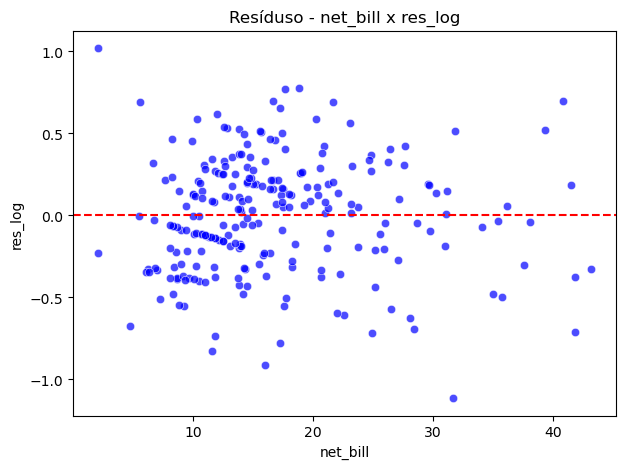

In [128]:
# Analisando o resíduo em função do total da conta (líquida)

plt.figure(figsize=[7,5])
sns.scatterplot(x = 'net_bill', y = 'res_log', data=tips, color='blue', alpha=.7)
# Linha em zero
plt.axhline(y=0, color='red', ls='--')
plt.title('Resíduso - net_bill x res_log')

**Utilizando o *boxplot* para analisar as variáveis qualitativas**

<Axes: xlabel='sex', ylabel='res_log'>

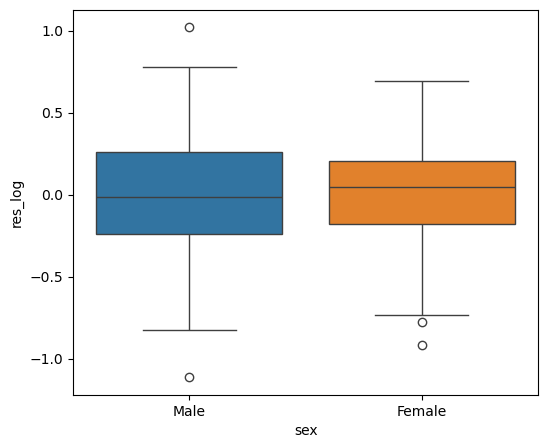

In [130]:
# Analisando em função do sex (mesmo não tendo entrado no modelo)

sns.boxplot(x='sex', 
            y='res_log', 
            data=tips,
            hue='sex',
            # color='blue',
)

Note que a distribuição do resíduo para *Male* e *Female* é bem parecida.

<Axes: xlabel='smoker', ylabel='res_log'>

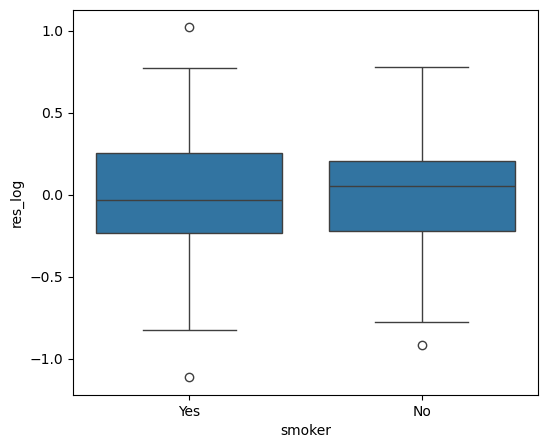

In [132]:
# Para smoker

# boxplot gera bons gráficos para variáveis qualitativas
sns.boxplot(x='smoker', 
            y='res_log', 
            data=tips, 
            # hue='smoker'
)

<Axes: xlabel='day', ylabel='res_log'>

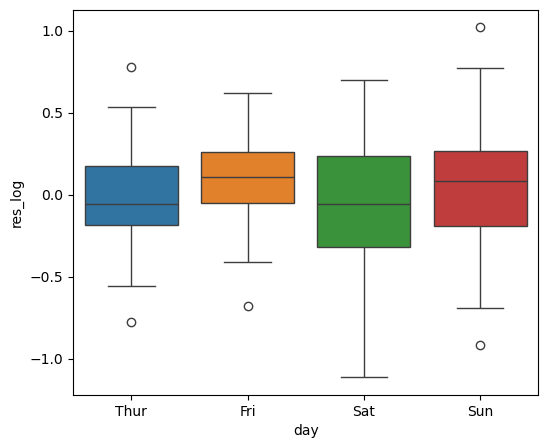

In [133]:
# Para os dias da semana

sns.boxplot(x='day',
            y='res_log', 
            data=tips,
            hue='day'
)

<Axes: xlabel='size', ylabel='res_log'>

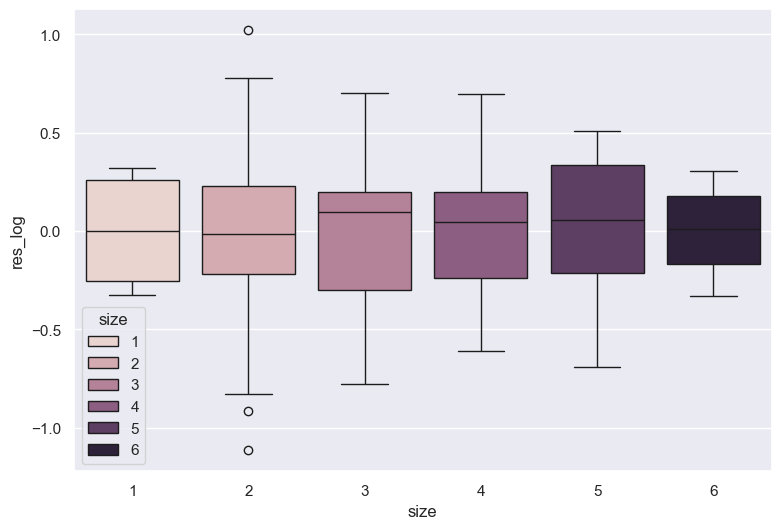

In [254]:
# Para o tamanho da mesa

plt.figure(figsize=[9,6])
sns.set_theme(style='darkgrid')
sns.boxplot(x='size', 
            y='res_log', 
            data=tips, 
            hue='size',
)

#### <span style='color:blue'> 8.2 - Análise dos valores preditos</span>

In [210]:
# Obtendo e armazenando os valores preditos

tips['pred_log'] = reg.fittedvalues

In [214]:
# O log das gorjetas

tips['tip_log'] = np.log(tips['tip'])

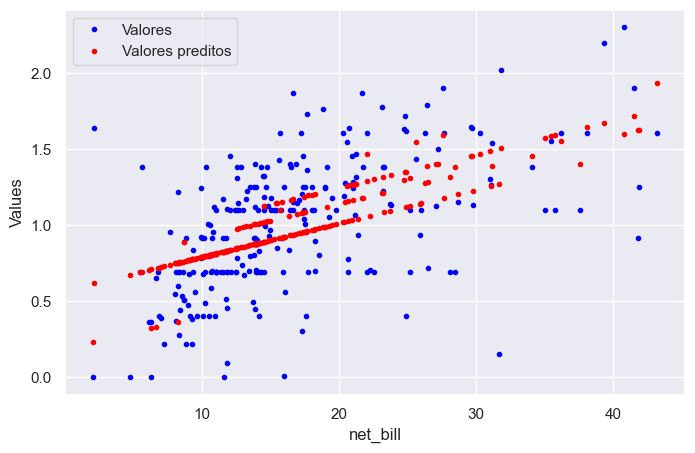

In [250]:
# Plotando

plt.figure(figsize=[8,5])
plt.plot(tips['net_bill'],tips['tip_log'], '.', color='blue', label='Valores')
plt.plot(tips['net_bill'], tips['pred_log'],'.', color='red', label='Valores preditos')
plt.xlabel('net_bill')
plt.ylabel('Values')
plt.legend()

In [276]:
# Testando novamente o modelo e avaliando o R^2

reg_2 = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data=tips).fit()

In [278]:
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.67e-21
Time:                        17:11:29   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
tips['pred_reg_2'] = reg_2.fittedvalues

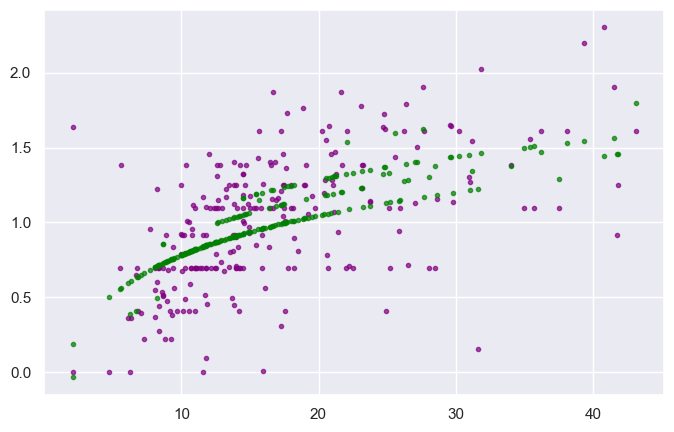

In [284]:
plt.figure(figsize=[8,5])
plt.plot(tips['net_bill'], tips['tip_log'], '.', color='purple', alpha=.7)
plt.plot(tips['net_bill'], tips['pred_reg_2'], '.', color='green', alpha=.7)